In [2]:
import random as rd;import numpy as np;import sys;import pickle
import torch
import torch.nn as nn
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import torch.optim as optim
import matplotlib.pyplot as plt
import math
import sys as s

In [8]:
!pip install -r requirements.txt

In [6]:
!pip3 install torch torchvision torchaudio

     |████████████████████████████████| 776.4 MB 9.6 kB/s  eta 0:00:01     |█████████████████████████       | 608.5 MB 12.1 MB/s eta 0:00:14     |██████████████████████████████  | 729.9 MB 11.9 MB/s eta 0:00:04     |███████████████████████████████▌| 764.1 MB 12.1 MB/s eta 0:00:02
     |████████████████████████████████| 19.1 MB 10.7 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 12.3 MB/s eta 0:00:01


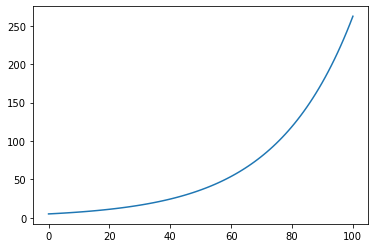

In [3]:
def expon(A,b,t):
    result = A*math.exp(b*t)
    return result

Y=[]
for i in range(0,100):
    y = expon(5,0.04,i)
    Y.append(y)
X = np.linspace(0,len(Y),len(Y))
plt.plot(X,Y)
plt.show()

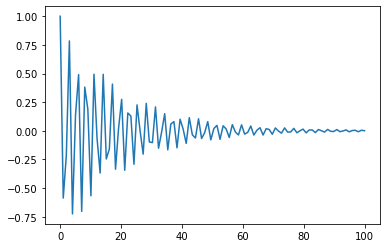

' o output pode ser um intervalo e a IA tem que dizer o qu'

In [6]:
def DampedPend(b,k,t,m):
    if t == 0:
        position = 1
    else:
        dump = math.exp(-(b/2*m)*t)
        omega = np.sqrt(k/m)*np.sqrt(1-(b**2)/(4*m*k))
        osc = np.cos(omega*t)
        position = dump*osc
    return position

Y=[]
for i in range(0,100):
    y = DampedPend(0.1,5,i,1)
    Y.append(y)
X = np.linspace(0,len(Y),len(Y))
plt.plot(X,Y)
plt.show()

''' preciso pensar em outra função para montar o Dataset'''
''' pensar no shape do output, dependendo da lógica que vamos abordar'''
''' o output pode ser um intervalo e a IA tem que dizer o qu'''
#-------------------------------------------------------------------


0
46
1
46
2
46
3
46
4
46
5
46
6
46
7
46
8
46
9
46
10
46
11
46
12
46
13
46
14
46
15
46
16
46
17
46
18
46
19
46
20
46
21
46
22
46
23
46
24
46
25
46
26
46
27
46
28
46
29
46
30
46
31
46
32
46
33
46
34
46
35
46
36
46
37
46
38
46
39
46
40
46
41
46
42
46
43
46
44
46
45
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46

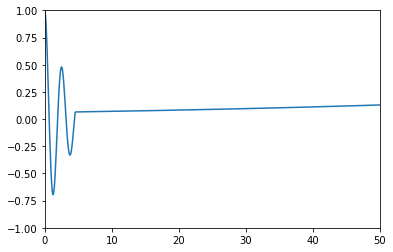

SystemExit: 

/home/v/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3377: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [21]:
def Dataset(n_batch, batch_size, exemplos_por_batch):
    inp = []
    question = []
    m = 1
    #T=[i for i in range(0,50)]
    T = np.linspace(0, 50, num=500)
    K = np.linspace(0.5, 11, num=50)
    B = np.linspace(0.5, 1.1, num=50)
    KK = []
    BB = []
#    K=np.linspace(5, 11, num=100)          #those are default values
#    B=np.linspace(0.5,1.1, num=100)        #those are default values
#'''         THIS IS FOR A RANDOM CONFIG OF K AND B'''
    for i in range(n_batch):
        t = []
        position = []
        full = 0
        while full != batch_size:
            ki = rd.randint(0, 49)
            bi = rd.randint(0, 49)
            k = K[ki]
            b = B[bi]
            KK.append(k)
            BB.append(b)
            y = []
            tpred = []
            z = 0
            aux = rd.randint(10, 50)
            for l in T:
                print(z)
                print(aux)
                if z < aux:
                    yy = DampedPend(b, k, l, m)
                    y.append(yy)
                    tpred.append(l)
                    z+=1
                    a = y[-1]
                else:# z > aux:
                    yy = expon(a,0.015,l)
                    y.append(yy)
                    tpred.append(l)
            plt.clf()  # uncoment to graph
            plt.xlim([0, 50])  # uncoment to graph
            plt.ylim([-1, 1])  # uncoment to graph
            plt.plot(tpred, y)  # uncoment to graph
            plt.pause(0.5)  # uncoment to graph
            s.exit()
            t.append(tpred)
            position.append(y)
            full += 1
        inp.append(position)
        question.append(t)
    KK = np.array(KK).reshape(n_batch, batch_size, 1)   # To works on scynet
    BB = np.array(BB).reshape(n_batch, batch_size, 1)   # To works on scynet
    Constantes = [KK, BB]
    inp = torch.as_tensor(inp)
    question = torch.as_tensor(question)
    plt.show()
    print('shape(question) =', np.shape(question))
    print('Constantes =', np.shape(Constantes))
    sys.exit()
    address = open("positions", "wb")
    pickle.dump(inp, address)
    address.close()
    address = open("question", "wb")
    pickle.dump(question, address)
    address.close()
    address = open("Constantes", "wb")
    pickle.dump(Constantes, address)
    address.close()
Dataset(5,1000,50)


In [3]:
import random as rd
print(rd.randint(0,10))

10
